In [29]:
import itertools

import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn import mixture
import pandas as pd

In [2]:


color_iter = itertools.cycle(['navy', 'c', 'cornflowerblue', 'gold',
                              'darkorange'])


def plot_results(X, Y_, means, covariances, index, title):
    splot = plt.subplot(2, 1, 1 + index)
    for i, (mean, covar, color) in enumerate(zip(
            means, covariances, color_iter)):
        v, w = linalg.eigh(covar)
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        u = w[0] / linalg.norm(w[0])
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        if not np.any(Y_ == i):
            continue
        plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], .8, color=color)

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan(u[1] / u[0])
        angle = 180. * angle / np.pi  # convert to degrees
        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(0.5)
        splot.add_artist(ell)

    plt.xlim(-9., 5.)
    plt.ylim(-3., 6.)
    plt.xticks(())
    plt.yticks(())
    plt.title(title)


# Number of samples per component
n_samples = 500

# Generate random sample, two components
np.random.seed(0)
C = np.array([[0., -0.1], [1.7, .4]])
X = np.r_[np.dot(np.random.randn(n_samples, 2), C),
          .7 * np.random.randn(n_samples, 2) + np.array([-6, 3])]



In [30]:
data = pd.read_csv("../교통사망사고정보/Kor_Train_교통사망사고정보(12.1~17.6).csv", encoding='euc-kr')

In [31]:
data.head()

,발생년,발생년월일시,발생분,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,...,도로형태_대분류,도로형태,당사자종별_1당_대분류,당사자종별_1당,당사자종별_2당_대분류,당사자종별_2당,발생위치X_UTMK,발생위치Y_UTMK,경도,위도
0,2017,2017063023,14,야간,금,1,1,0,0,0,...,단일로,기타단일로,승용차,승용차,보행자,보행자,967633,1937456,127.134130,37.435704
1,2017,2017063021,45,야간,금,1,4,2,1,0,...,단일로,기타단일로,승용차,승용차,승용차,승용차,966456,1696405,127.131220,35.262534
2,2017,2017063021,50,야간,금,1,1,0,0,0,...,단일로,기타단일로,승용차,승용차,보행자,보행자,900057,1865697,126.379922,36.784142
3,2017,2017063019,10,야간,금,1,1,0,0,0,...,교차로,교차로부근,승용차,승용차,이륜차,이륜차,1095230,1764891,128.554945,35.875973
4,2017,2017063017,2,주간,금,1,2,1,0,0,...,단일로,교량위,이륜차,이륜차,화물차,화물차,947576,1946355,126.906786,37.514993


In [32]:
data = data.loc[(data['경도'] < 130) & (data['경도'] > 125)]

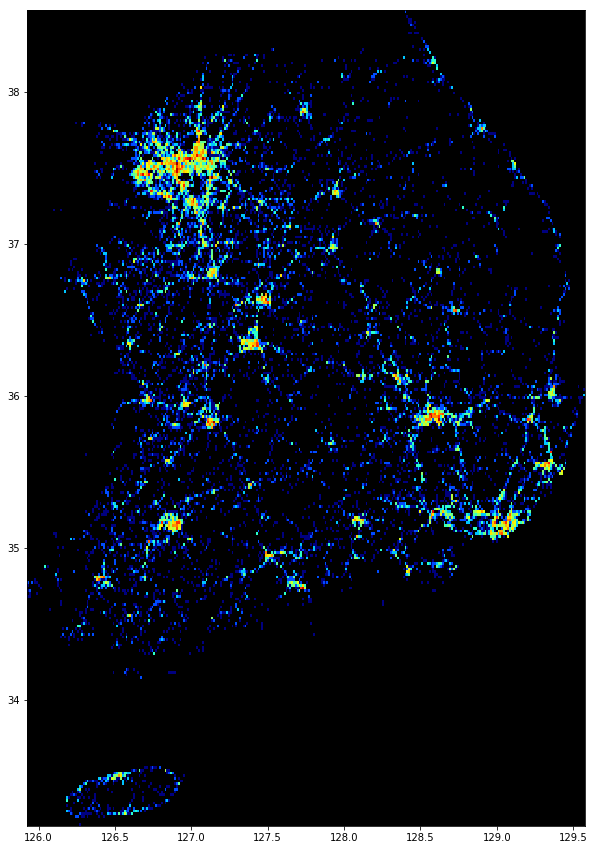

In [33]:
from matplotlib.colors import LogNorm
import copy

cmap = copy.copy(plt.cm.jet)
cmap.set_bad((0,0,0))

plt.figure(figsize=(10, 15))
plt.hist2d(data['경도'], data['위도'], bins=300, norm=LogNorm(), cmap=cmap);

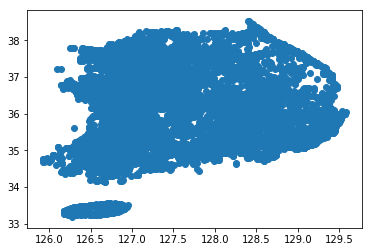

In [34]:
plt.scatter(data['경도'], data['위도']);

DBSCAN

In [36]:
X = data[['경도', '위도']].values

In [51]:
db = DBSCAN(eps=0.03, min_samples=5).fit(X)

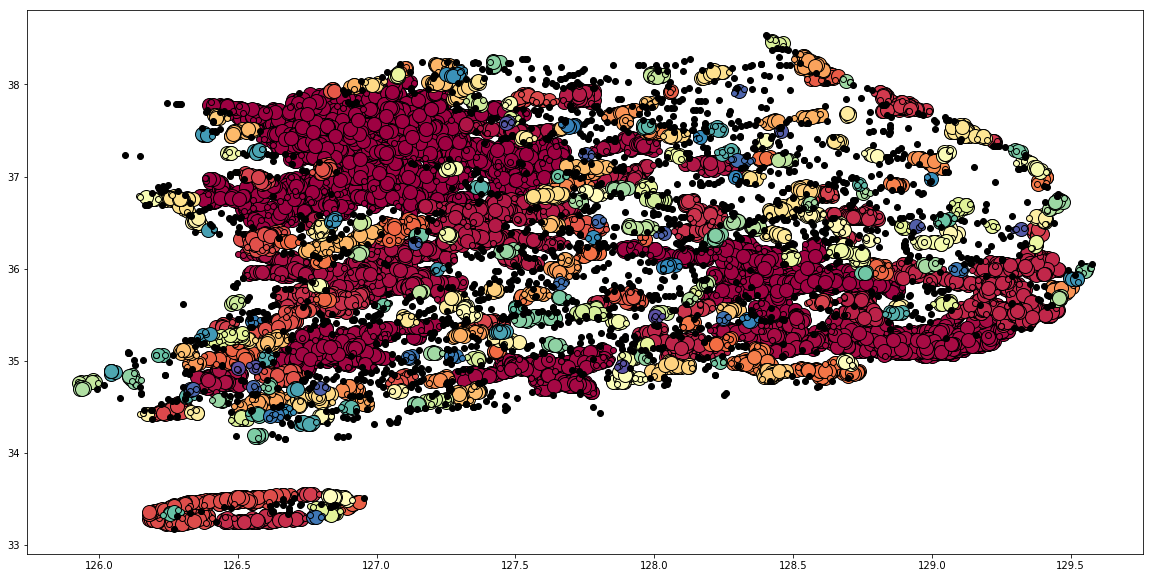

In [52]:
labels = db.labels_
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))


# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

# plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [48]:
np.unique(labels)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
       50, 51, 52, 53, 54, 55, 56])

BGMM

In [75]:
dpgmm = mixture.BayesianGaussianMixture(n_components=200,
                                        covariance_type='full').fit(X)

/Users/Daniel/anaconda3/envs/carnegie3/lib/python3.6/site-packages/sklearn/mixture/base.py:237: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


In [77]:
X = X
Y_ = dpgmm.predict(X)
means = dpgmm.means_
covariances = dpgmm.covariances_
index = 1
title = 'title'

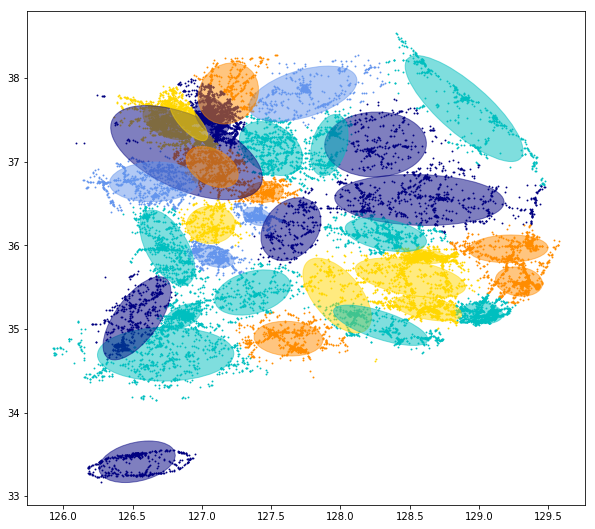

In [78]:

plt.figure(figsize=(10, 20))
splot = plt.subplot(2, 1, 1 + index)
for i, (mean, covar, color) in enumerate(zip(
        means, covariances, color_iter)):
    v, w = linalg.eigh(covar)
    v = 2. * np.sqrt(2.) * np.sqrt(v)
    u = w[0] / linalg.norm(w[0])
    # as the DP will not use every component it has access to
    # unless it needs it, we shouldn't plot the redundant
    # components.
    if not np.any(Y_ == i):
        continue
    plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], .8, color=color)

    # Plot an ellipse to show the Gaussian component
    angle = np.arctan(u[1] / u[0])
    angle = 180. * angle / np.pi  # convert to degrees
    ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(0.5)
    splot.add_artist(ell)

In [79]:
len(means)

200

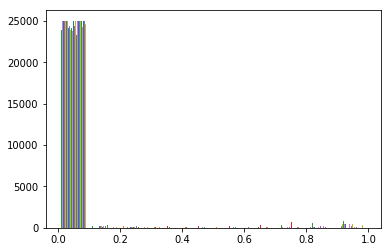

In [73]:
plt.hist(dpgmm.predict_proba(X));

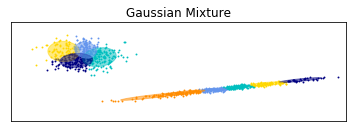

In [8]:
# Fit a Gaussian mixture with EM using five components
gmm = mixture.GaussianMixture(n_components=10, covariance_type='full').fit(X)
plot_results(X, gmm.predict(X), gmm.means_, gmm.covariances_, 0,
             'Gaussian Mixture')




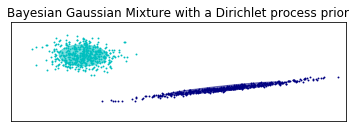

In [10]:
# Fit a Dirichlet process Gaussian mixture using five components
dpgmm = mixture.BayesianGaussianMixture(n_components=100,
                                        covariance_type='full').fit(X)


([array([ 1000.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.]),
  array([ 1000.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.]),
  array([ 1000.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.]),
  array([ 500.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,  500.]),
  array([ 500.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,  500.]),
  array([ 1000.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.]),
  array([ 1000.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.]),
  array([ 1000.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.]),
  array([ 1000.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.]),
  array([ 1000.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.])],
 array([  3.81262201e-303,   9.999999

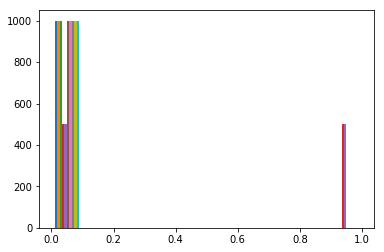

In [15]:
plt.hist(dpgmm.predict_proba(X))

In [11]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

In [12]:
db = DBSCAN(eps=0.3, min_samples=10).fit(X)

In [21]:
labels = db.labels_
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

# plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

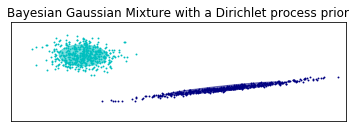

In [27]:
plot_results(X, dpgmm.predict(X), dpgmm.means_, dpgmm.covariances_, 1,
             'Bayesian Gaussian Mixture with a Dirichlet process prior')

plt.show()

In [16]:
plot_results(X, db.fit_predict(X), db.means_, db.covariances_, 1,
             'Bayesian Gaussian Miature with a Dirichlet process prior')

plt.show()

AttributeError: 'DBSCAN' object has no attribute 'means_'